In [1]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly

In [2]:
# read John Hopkins data from Github
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_global = pd.read_csv(base_url + 'time_series_covid19_confirmed_global.csv')
deaths_global = pd.read_csv(base_url + 'time_series_covid19_deaths_global.csv')
confirmed_us = pd.read_csv(base_url + 'time_series_covid19_confirmed_US.csv')
deaths_us = pd.read_csv(base_url + 'time_series_covid19_deaths_US.csv')

# get latest or current date from data set(s)
latest_date = confirmed_us.columns.values[-1]

# aggregate data by state (separate highest and lowest states)
us_drop_columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Country_Region', 'Lat', 'Long_', 'Combined_Key']
confirmed_us.drop(us_drop_columns, axis=1, inplace=True)
deaths_us.drop(us_drop_columns + ['Population'], axis=1, inplace=True)
confirmed_us_sorted = confirmed_us.groupby('Province_State').agg('sum').sort_values(by=latest_date, ascending=False)
deaths_us_sorted = deaths_us.groupby('Province_State').agg('sum').sort_values(by=latest_date, ascending=False)
states = confirmed_us_sorted.T.columns.values

us_confirmed = confirmed_us_sorted.T
us_deaths = deaths_us_sorted.T[states]

# aggregate data by country
global_drop_columns = ['Province/State', 'Lat', 'Long']
confirmed_global.drop(global_drop_columns, axis=1, inplace=True)
confirmed_global_sorted = confirmed_global.groupby('Country/Region').agg('sum').sort_values(by=latest_date, ascending=False)
deaths_global.drop(global_drop_columns, axis=1, inplace=True)
deaths_global_sorted = deaths_global.groupby('Country/Region').agg('sum').sort_values(by=latest_date, ascending=False)
countries = confirmed_global_sorted.T.columns.values

global_confirmed = confirmed_global_sorted.T
global_deaths = deaths_global_sorted.T

In [3]:
# output current results
current_confirmed_global = confirmed_global_sorted[[latest_date]]
current_confirmed_global = current_confirmed_global.rename(columns={latest_date: 'confirmed'})
# print(current_confirmed_global.head())

current_deaths_global = deaths_global_sorted[[latest_date]]
current_deaths_global = current_deaths_global.rename(columns={latest_date: 'deaths'})
# print(current_deaths_global.head())

# join confirmed with deaths
joined_global = current_confirmed_global.merge(current_deaths_global, left_index=True, right_index=True)
joined_global['percentDeaths'] = joined_global['deaths'].divide(joined_global['confirmed'], axis=0)

joined_global.head(20)

,confirmed,deaths,percentDeaths
Country/Region,,,
US,526396,20463,0.038874
Spain,163027,16606,0.101860
Italy,152271,19468,0.127851
France,130727,13851,0.105954
Germany,124908,2736,0.021904
China,83014,3343,0.040270
United Kingdom,79874,9892,0.123845
Iran,70029,4357,0.062217
Turkey,52167,1101,0.021105


In [4]:
# output current results
current_confirmed_us = confirmed_us_sorted[[latest_date]]
current_confirmed_us = current_confirmed_us.rename(columns={latest_date: 'confirmed'})
# print(current_confirmed_global.head())

current_deaths_us = deaths_us_sorted[[latest_date]]
current_deaths_us = current_deaths_us.rename(columns={latest_date: 'deaths'})
# print(current_deaths_global.head())

# join confirmed with deaths
joined_us = current_confirmed_us.merge(current_deaths_us, left_index=True, right_index=True)
joined_us['percentDeaths'] = joined_us['deaths'].divide(joined_us['confirmed'], axis=0)

joined_us.head(20)

,confirmed,deaths,percentDeaths
Province_State,,,
New York,181026,8627,0.047656
New Jersey,58151,2183,0.037540
Michigan,23605,1384,0.058632
Massachusetts,22860,686,0.030009
Pennsylvania,21719,503,0.023159
California,21706,605,0.027872
Louisiana,20014,806,0.040272
Illinois,19180,677,0.035297
Florida,18494,438,0.023683


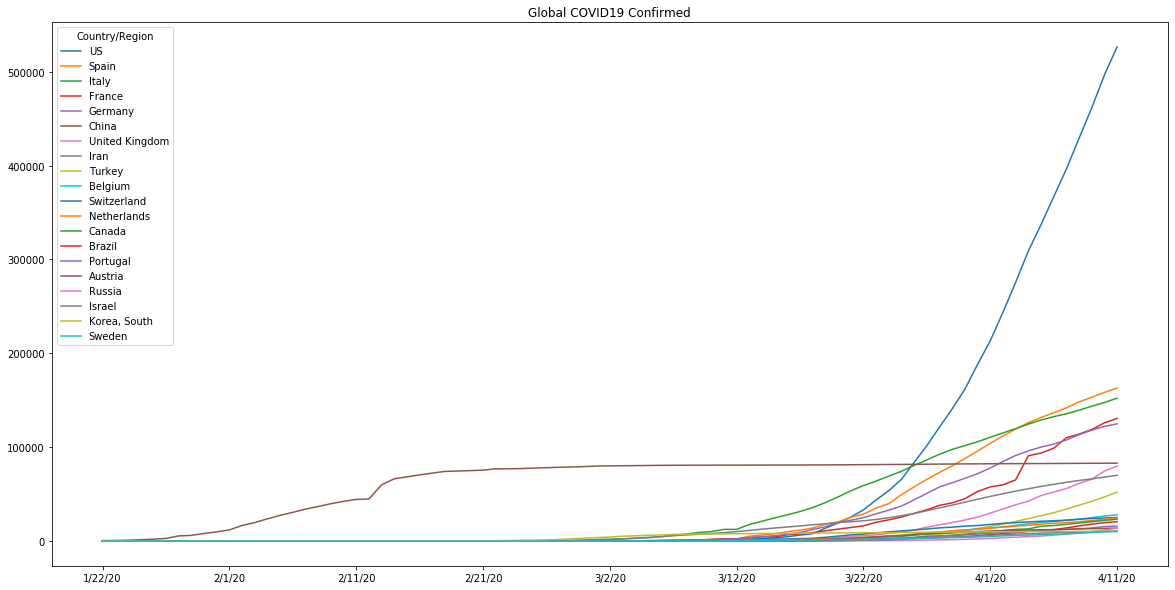

In [5]:
confirmed_global_sorted[:20].T.plot(figsize=(20,10), title="Global COVID19 Confirmed")

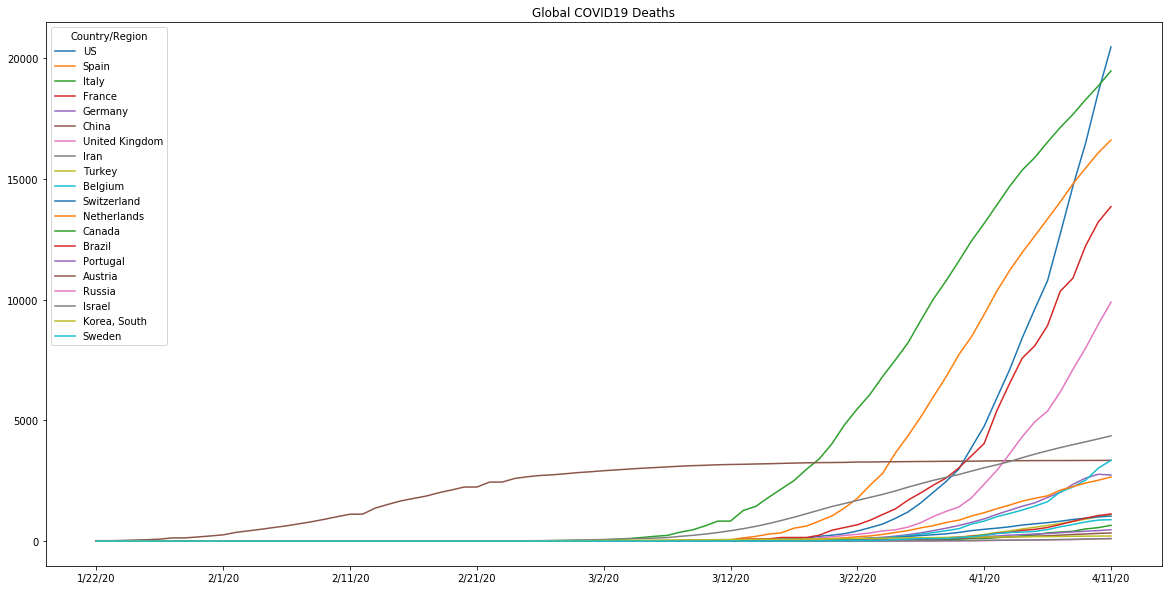

In [6]:
countries = confirmed_global_sorted.T.columns.values
deaths_global_sorted.T[countries[0:20]].plot(figsize=(20,10), title="Global COVID19 Deaths")

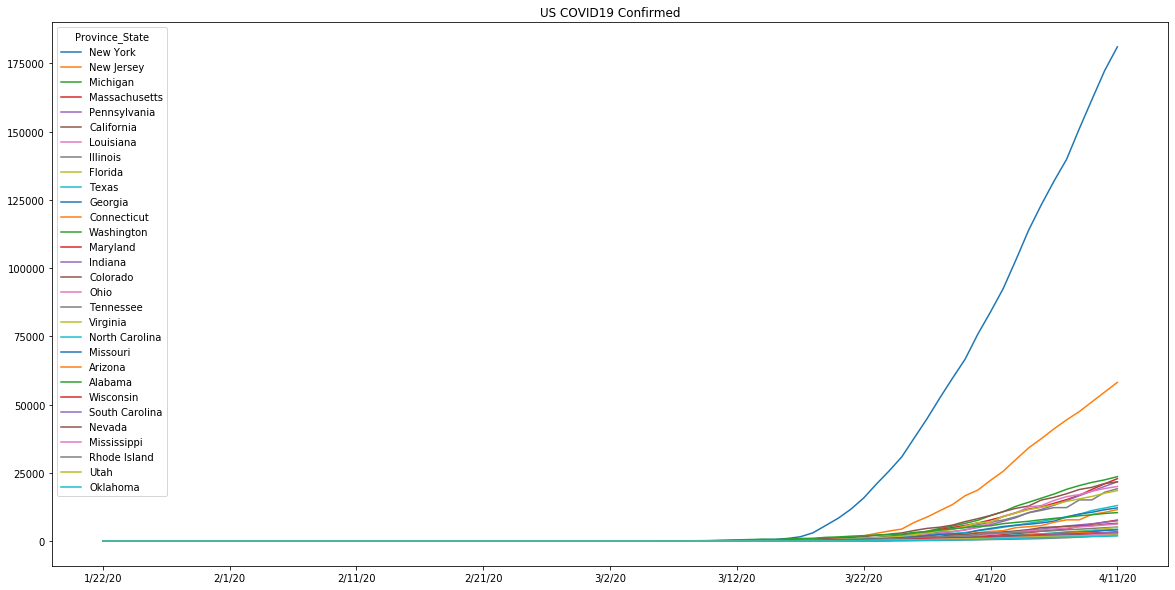

In [7]:
confirmed_us_sorted[:30].T.plot(figsize=(20,10), title="US COVID19 Confirmed")

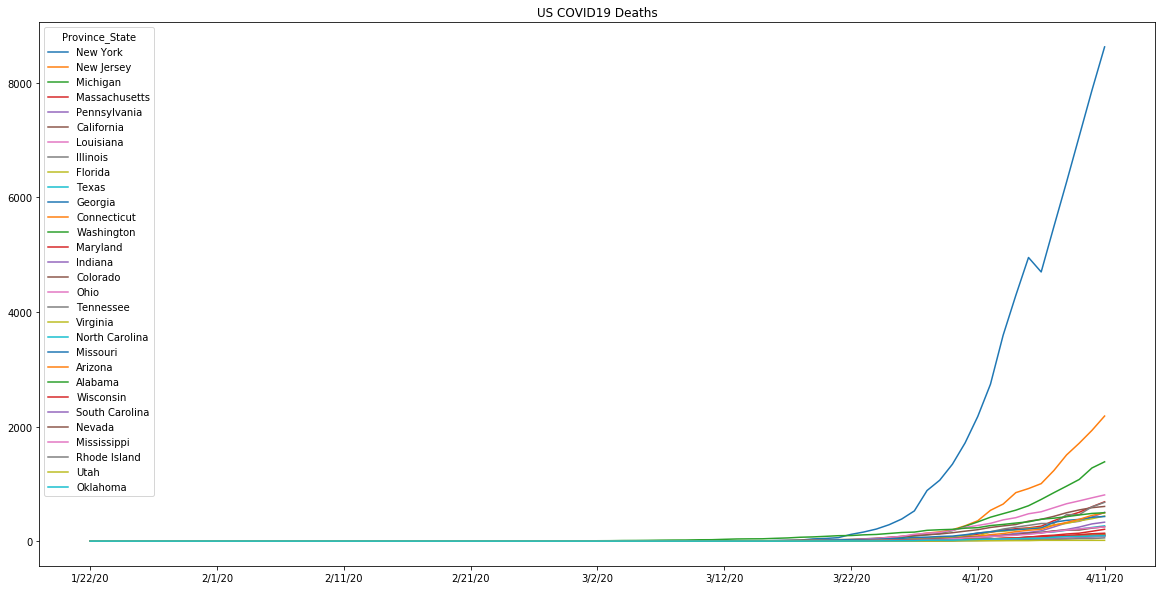

In [8]:
states = confirmed_us_sorted.T.columns.values
deaths_us_sorted.T[states[0:30]].plot(figsize=(20,10), title="US COVID19 Deaths")